In [43]:
import numpy as np
import pandas as pd

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [46]:
raw_train = pd.read_csv('train.csv', index_col = 'Id')
raw_test = pd.read_csv('test.csv', index_col = 'Id')

raw_train['train'] = 1
raw_test['train'] = 0

raw_test['SalePrice'] = 0

#df_full = df_train.append(df_test)
raw_full = pd.concat([raw_train, raw_test], ignore_index = False)

col_price = raw_full['SalePrice']
raw_full = raw_full.drop('SalePrice', axis = 1)

C:\Users\Bob\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [47]:
df_full = raw_full.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)

df_full = df_full.interpolate()
df_full = pd.get_dummies(df_full, drop_first = True, dummy_na = True)

train_set = df_full[df_full['train'] == 1]
test_set = df_full[df_full['train'] == 0]

df_full['SalePrice'] = col_price

In [48]:
X = train_set
y = raw_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 256)

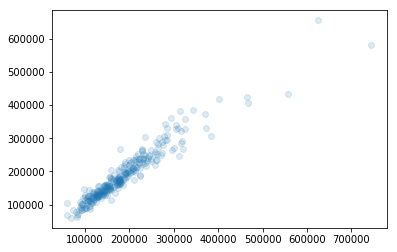

In [50]:
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

test_pred = gbr.predict(test_set)

plt.scatter(y_test, y_pred, alpha = 0.15)

In [51]:
feat_imp = pd.Series(gbr.feature_importances_, X_train.columns).sort_values(ascending = False)
feat_imp

OverallQual             0.073356
GrLivArea               0.072812
GarageArea              0.044886
BsmtUnfSF               0.043058
BsmtFinSF1              0.042399
LotArea                 0.040704
GarageYrBlt             0.035456
WoodDeckSF              0.032123
1stFlrSF                0.029007
MoSold                  0.027664
2ndFlrSF                0.025968
YearBuilt               0.023275
OverallCond             0.023150
LotFrontage             0.023088
TotalBsmtSF             0.023019
OpenPorchSF             0.019518
ScreenPorch             0.017988
YearRemodAdd            0.017066
SaleCondition_Family    0.015506
MasVnrArea              0.010603
EnclosedPorch           0.010425
BsmtFinSF2              0.010000
Exterior1st_BrkFace     0.009525
YrSold                  0.009394
Neighborhood_StoneBr    0.009348
FullBath                0.009238
PoolArea                0.008796
BsmtFullBath            0.008478
Functional_Typ          0.008262
Neighborhood_Crawfor    0.008203
          

Text(0,0.5,'Feature Importance Score')

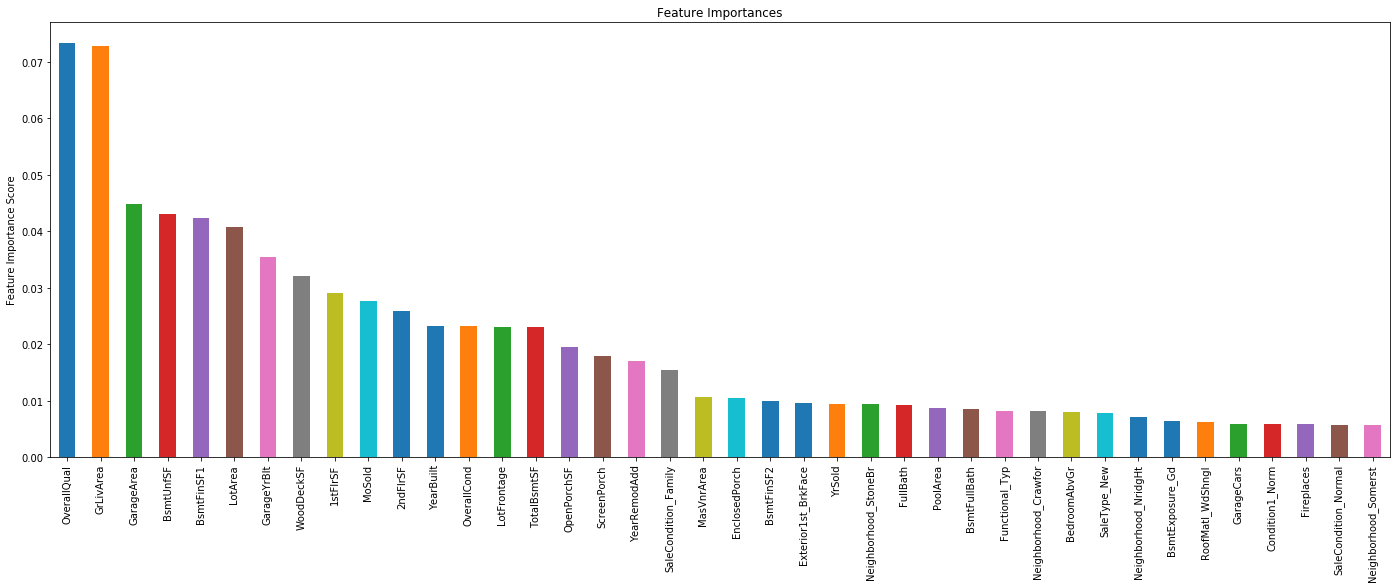

In [52]:
plt.figure(figsize = (24, 8))
feat_imp.head(40).plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [53]:
df_feat_imp = pd.DataFrame(feat_imp, columns = ['Importance'])
df_feat_imp.describe()

,Importance
count,276.000000
mean,0.003623
std,0.009403
min,0.000000
25%,0.000000
50%,0.000450
75%,0.002687
max,0.073356


In [54]:
useful_cols = df_feat_imp[df_feat_imp['Importance'] > 0.002745].index
useful_cols

Index(['OverallQual', 'GrLivArea', 'GarageArea', 'BsmtUnfSF', 'BsmtFinSF1',
       'LotArea', 'GarageYrBlt', 'WoodDeckSF', '1stFlrSF', 'MoSold',
       '2ndFlrSF', 'YearBuilt', 'OverallCond', 'LotFrontage', 'TotalBsmtSF',
       'OpenPorchSF', 'ScreenPorch', 'YearRemodAdd', 'SaleCondition_Family',
       'MasVnrArea', 'EnclosedPorch', 'BsmtFinSF2', 'Exterior1st_BrkFace',
       'YrSold', 'Neighborhood_StoneBr', 'FullBath', 'PoolArea',
       'BsmtFullBath', 'Functional_Typ', 'Neighborhood_Crawfor',
       'BedroomAbvGr', 'SaleType_New', 'Neighborhood_NridgHt',
       'BsmtExposure_Gd', 'RoofMatl_WdShngl', 'GarageCars', 'Condition1_Norm',
       'Fireplaces', 'SaleCondition_Normal', 'Neighborhood_Somerst',
       'MSSubClass', 'LowQualFinSF', 'GarageType_CarPort', 'LotConfig_FR2',
       'Exterior1st_MetalSd', 'Neighborhood_Timber', 'Neighborhood_Edwards',
       'RoofMatl_Tar&Grv', 'Exterior2nd_MetalSd', 'TotRmsAbvGrd',
       'LotConfig_CulDSac', 'Neighborhood_BrkSide', 'FireplaceQu_F

In [55]:
useful_cols = ['GrLivArea', 'OverallQual', 'LotArea', 'BsmtUnfSF', 'GarageArea',
               'TotalBsmtSF', 'BsmtFinSF1', 'LotFrontage', 'GarageYrBlt', '2ndFlrSF',
               '1stFlrSF', 'YearBuilt', 'OverallCond', 'MoSold', 'BedroomAbvGr',
               'MasVnrArea', 'OpenPorchSF', 'YearRemodAdd', 'GarageCars', 'WoodDeckSF',
               'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'ScreenPorch',
               'BsmtFullBath', 'Condition1_Norm', 'BsmtFinSF2', 'BsmtExposure_Gd',
               'Exterior1st_BrkFace', 'Fireplaces', 'Functional_Sev',
               'Neighborhood_Edwards', 'EnclosedPorch', 'SaleCondition_Normal',
               'Neighborhood_NridgHt', 'SaleCondition_Family', 'Neighborhood_BrkSide',
               'KitchenQual_Gd', 'PoolArea', 'Street_Pave', 'MSSubClass',
               'Functional_Typ', 'Neighborhood_Somerst', 'TotRmsAbvGrd',
               'KitchenAbvGr', 'YrSold', 'FullBath', 'BsmtFinType1_Rec',
               'Electrical_nan', 'SaleType_New', 'BsmtCond_Gd', 'Neighborhood_Veenker',
               'BsmtExposure_No', 'RoofMatl_WdShngl', 'LowQualFinSF',
               'Neighborhood_CollgCr', 'Condition1_RRAe', 'ExterQual_Gd',
               'SaleCondition_Partial', 'FireplaceQu_Fa', 'Heating_OthW',
               'LotConfig_FR2', 'Functional_Mod', 'Exterior2nd_MetalSd',
               'Exterior2nd_Stucco', '3SsnPorch', 'Neighborhood_Mitchel',
               'Functional_Maj2', 'HalfBath', 'Neighborhood_NoRidge',
               'train', 'SalePrice'
              ]

df_useful = df_full[useful_cols]
#df_useful = df_full

In [56]:
train_features = df_useful[df_useful['train'] == 1].drop('SalePrice', axis = 1).drop('train', axis = 1)
train_target = df_useful[df_useful['train'] == 1]['SalePrice']

test_features = df_useful[df_useful['train'] == 0].drop('SalePrice', axis = 1).drop('train', axis = 1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size = 0.2)

RMSE: 20652.074622244163


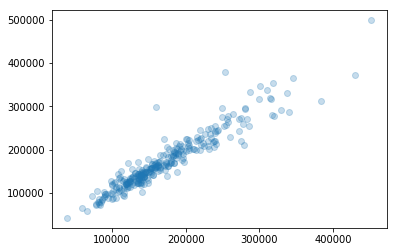

In [58]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(n_estimators = 512)
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

plt.scatter(y_test, y_pred, alpha = 0.25)

RMSE: 20395.205783400135


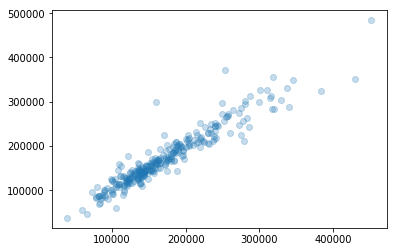

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 8192)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

plt.scatter(y_test, y_pred, alpha = 0.25)

In [60]:
useful_cols = ['GrLivArea', 'OverallQual', 'LotArea', 'BsmtUnfSF', 'GarageArea',
            'TotalBsmtSF', 'BsmtFinSF1', 'LotFrontage', 'GarageYrBlt', '2ndFlrSF',
            '1stFlrSF', 'YearBuilt', 'OverallCond', 'MoSold', 'BedroomAbvGr',
            'MasVnrArea', 'OpenPorchSF', 'YearRemodAdd', 'GarageCars', 'WoodDeckSF',
            'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'ScreenPorch',
            'BsmtFullBath', 'Condition1_Norm', 'BsmtFinSF2', 'BsmtExposure_Gd',
            'Exterior1st_BrkFace', 'Fireplaces', 'Functional_Sev',
            'Neighborhood_Edwards', 'EnclosedPorch', 'SaleCondition_Normal',
            'Neighborhood_NridgHt', 'SaleCondition_Family', 'Neighborhood_BrkSide',
            'KitchenQual_Gd', 'PoolArea', 'Street_Pave', 'MSSubClass',
            'Functional_Typ', 'Neighborhood_Somerst', 'TotRmsAbvGrd',
            'KitchenAbvGr', 'YrSold', 'FullBath', 'BsmtFinType1_Rec',
            'Electrical_nan', 'SaleType_New', 'BsmtCond_Gd', 'Neighborhood_Veenker',
            'BsmtExposure_No', 'RoofMatl_WdShngl', 'LowQualFinSF',
            'Neighborhood_CollgCr', 'Condition1_RRAe', 'ExterQual_Gd',
            'SaleCondition_Partial', 'FireplaceQu_Fa', 'Heating_OthW',
            'LotConfig_FR2', 'Functional_Mod', 'Exterior2nd_MetalSd',
            'Exterior2nd_Stucco', '3SsnPorch', 'Neighborhood_Mitchel',
            'Functional_Maj2', 'HalfBath', 'Neighborhood_NoRidge']

In [61]:
predictions = gbr.predict(test_features)
df_pred = pd.DataFrame({'Id': test_features.index, 'SalePrice': predictions.round(2)})

df_pred.head()

,Id,SalePrice
0,1461,113424.49
1,1462,167948.99
2,1463,182095.41
3,1464,191087.24
4,1465,171053.98


In [62]:
df_pred.to_csv('submission.csv', index = False)